In [66]:
# importing necessary libraries and pakages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
import category_encoders as ce
from sklearn.decomposition import PCA
import xgboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,KFold
import warnings
warnings.filterwarnings('ignore')
sb.set()

### EDA and Data-preprocessing

In [67]:
ds = pd.read_csv('Bias_correction_ucl.csv')
ds

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [68]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [69]:
ds.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [70]:
# defining function to change a column date information into year, month and weekday.
def to_date_time(col, df):
    df[col] = pd.to_datetime(df[col], infer_datetime_format = True)
        
    if len(df[col].dt.year.unique()) != 1:
        df[col+'(year)'] = df[col].dt.year
    else:
        pass
    if len(df[col].dt.month.unique()) != 1:
        df[col+'(month)'] = df[col].dt.month
        
        month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
        df[col+'(month)'] = df[col+'(month)'].map(month_map)
    
    else:
        pass
    if len(df[col].dt.dayofweek.unique()) != 1:
        df[col+'(weekday)'] = df[col].dt.dayofweek
        
        weekday_map = {6:'SUN', 5:'SAT', 4:'FRI', 3:'THU', 2:'WED', 1:'TUE', 0: 'MON'}
        df[col+'(weekday)'] = df[col+'(weekday)'].map(weekday_map)
        
        
    df.drop([col], 1, inplace = True)
    
    return df       

In [71]:
to_date_time('Date', ds)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date(year),Date(month),Date(weekday)
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.0,Jun,SUN
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.0,Jun,SUN
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.0,Jun,SUN
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.0,Jun,SUN
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.0,Jun,SUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.0,Aug,WED
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.0,Aug,WED
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.0,Aug,WED
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


In [72]:
ds

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date(year),Date(month),Date(weekday)
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.0,Jun,SUN
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.0,Jun,SUN
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.0,Jun,SUN
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.0,Jun,SUN
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.0,Jun,SUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.0,Aug,WED
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.0,Aug,WED
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.0,Aug,WED
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


In [73]:
# sepearing numeric and categoric columns for separate analysis
cat = ['station','Date(year)','Date(month)','Date(weekday)']
numeric = []
for col in ds.columns:
    if col not in cat:
        numeric.append(col)    

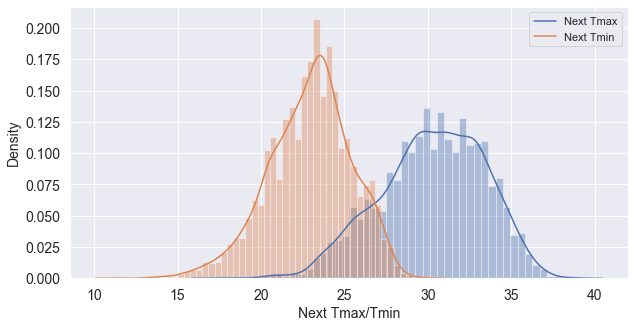

In [74]:
plt.figure(figsize = (10,5))
sb.distplot(ds['Next_Tmax'])
sb.distplot(ds['Next_Tmin'])
plt.legend(['Next Tmax','Next Tmin'])
plt.xlabel('Next Tmax/Tmin', fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Density', fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

We can see from the plot, that both Next Tmax and Tmin are almost normally distributed, and also their means are significantly different.

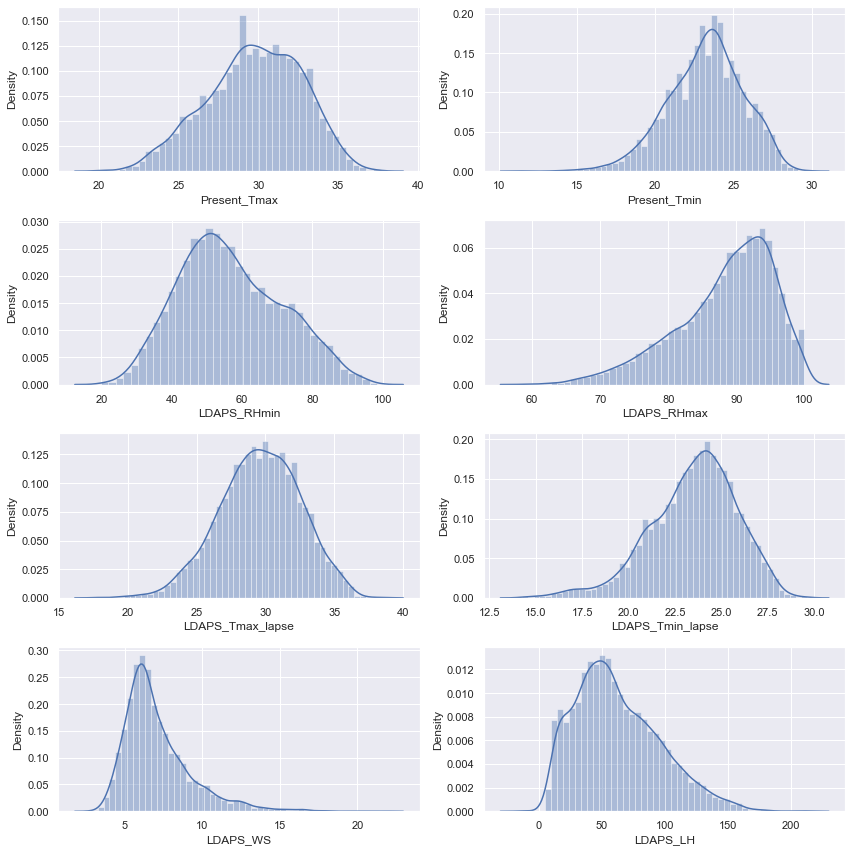

In [75]:
for i, col in enumerate(numeric[0:8]):
    
    plt.subplot(4,2, i+1)

    sb.distplot(ds[col])

    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

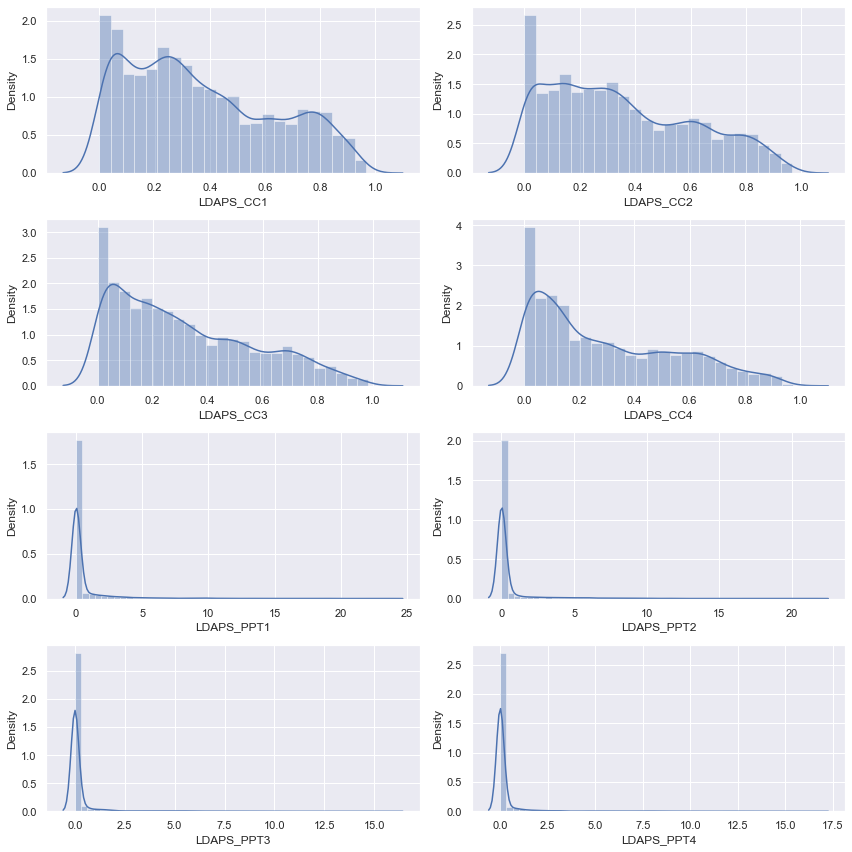

In [76]:
for i, col in enumerate(numeric[8:16]):
    
    plt.subplot(4,2, i+1)

    sb.distplot(ds[col])

    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

From above plots, the last 4 features are highly right skewed.

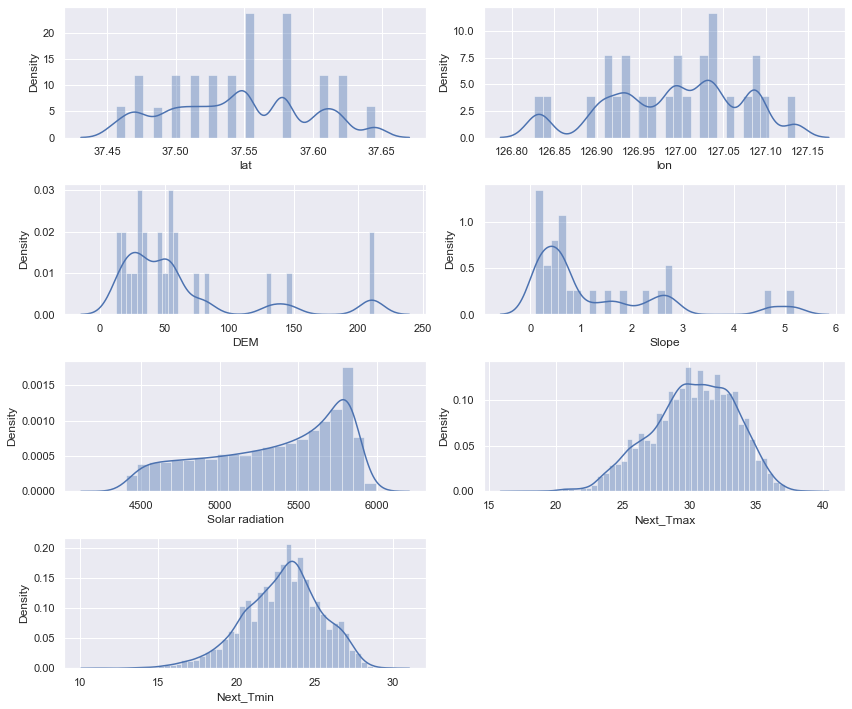

In [77]:
for i, col in enumerate(numeric[16:]):
    
    plt.subplot(5,2, i+1)

    sb.distplot(ds[col])

    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(12,12)
    plt.tight_layout()
plt.show()

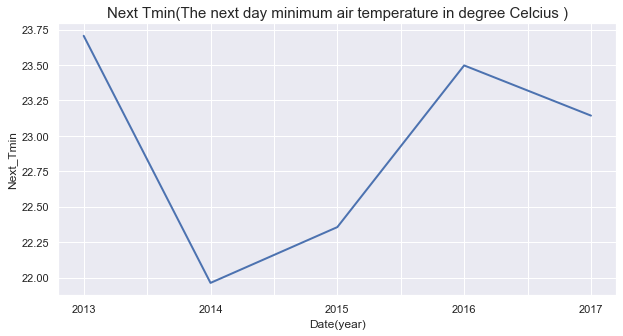

In [78]:
plt.figure(figsize = (10,5))
ax = sb.lineplot(data=ds, x='Date(year)', y='Next_Tmin', lw = 2)
ax.set_xticklabels(['','2013','','2014','','2015','','2016','','2017'])
plt.title('Next Tmin(The next day minimum air temperature in degree Celcius )', fontsize = 15)
plt.show()

From above plot, we see that Next Tmin was maximum and minimum on two consecutive years, i.e. 2013 and 2014.

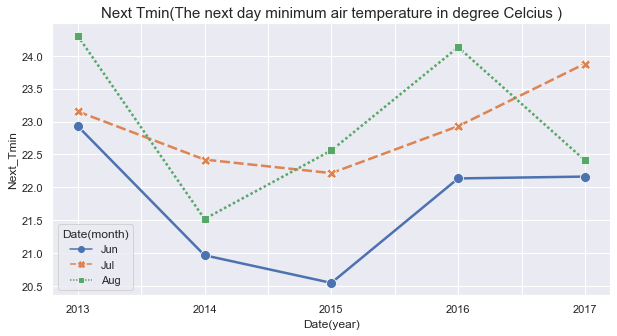

In [79]:
plt.figure(figsize = (10,5))
ax = sb.lineplot(data=ds, x='Date(year)', y='Next_Tmin', hue = 'Date(month)', ci = None,
           style='Date(month)', lw = 2.5, markers= True, markersize = 10)
ax.set_xticklabels(['','2013','','2014','','2015','','2016','','2017'])
plt.title('Next Tmin(The next day minimum air temperature in degree Celcius )', fontsize = 15)
plt.show()

From above plots, Next Tmin is usually minimum on June month.

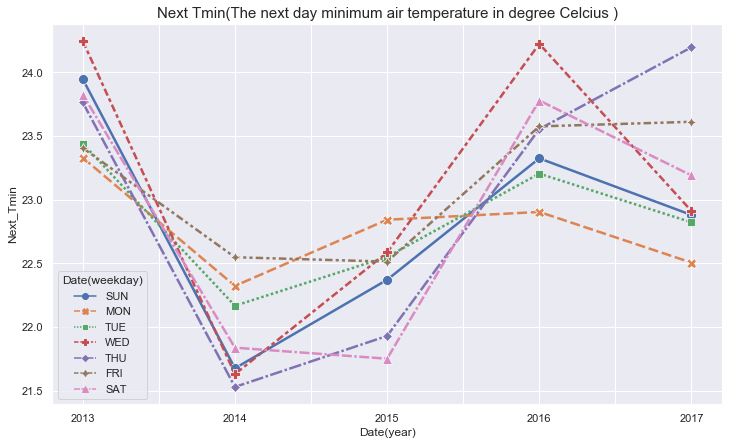

In [80]:
plt.figure(figsize = (12,7))
ax = sb.lineplot(data=ds, x='Date(year)', y='Next_Tmin', hue = 'Date(weekday)',ci = None,
            lw = 2.5, style = 'Date(weekday)', markers= True, markersize = 10)
plt.title('Next Tmin(The next day minimum air temperature in degree Celcius )', fontsize = 15)
ax.set_xticklabels(['','2013','','2014','','2015','','2016','','2017'])
plt.show()

During Wednesdays for 2014 and 2016, we would probably get to see maximum variations in Next Tmin. 

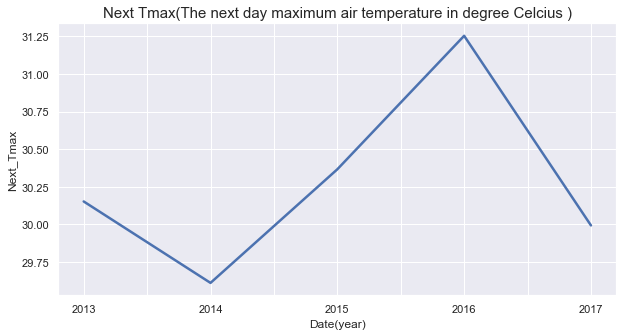

In [81]:
plt.figure(figsize = (10,5))
ax = sb.lineplot(data=ds, x='Date(year)', y='Next_Tmax', lw = 2.5,dashes = True)
ax.set_xticklabels(['','2013','','2014','','2015','','2016','','2017'])
plt.title('Next Tmax(The next day maximum air temperature in degree Celcius )', fontsize = 15)
plt.show()

From above plot, we see that, Next Tmax was minimum and maximum on 2014 and 2016 respectively.

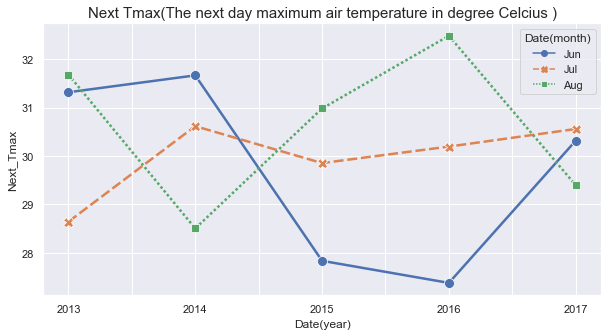

In [82]:
plt.figure(figsize = (10,5))
ax = sb.lineplot(data=ds, x='Date(year)', y='Next_Tmax', hue = 'Date(month)', ci = None,
style='Date(month)', lw = 2.5, markers= True, markersize = 10)
ax.set_xticklabels(['','2013','','2014','','2015','','2016','','2017'])
plt.title('Next Tmax(The next day maximum air temperature in degree Celcius )', fontsize = 15)
plt.show()

From above plots, Next Tmax is usually higher on July and August.

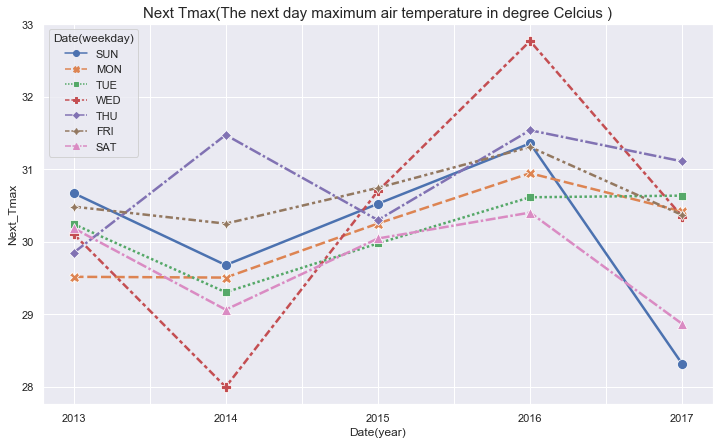

In [83]:
plt.figure(figsize = (12,7))
ax = sb.lineplot(data=ds, x='Date(year)', y='Next_Tmax', hue = 'Date(weekday)',ci = None,
            style='Date(weekday)', lw = 2.5 , markers= True, markersize = 10)
ax.set_xticklabels(['','2013','','2014','','2015','','2016','','2017'])
plt.title('Next Tmax(The next day maximum air temperature in degree Celcius )', fontsize = 15)
plt.show()

During Wednesdays for 2014 and 2016, we would probably get to see maximum variations in Next Tmax. 

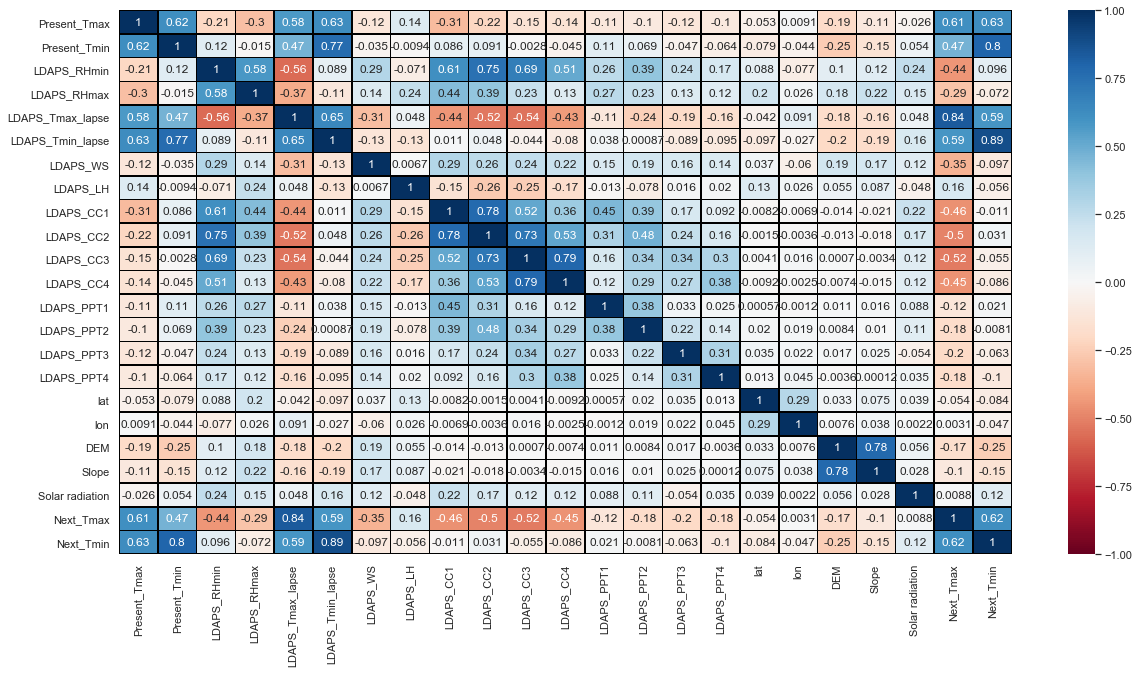

In [84]:
plt.figure(figsize = (20,10))
sb.heatmap(ds[numeric].corr(), cmap = 'RdBu', vmin = -1, vmax = 1, center = 0, 
           linewidth = .5, linecolor = 'black', annot = True)

From above heatmap, we see many features are correlated to each other, to which we shall PCA transform to also reduce the overall feature dimensions.

Text(0.5, 1.0, 'Distribution of un-scaled data')

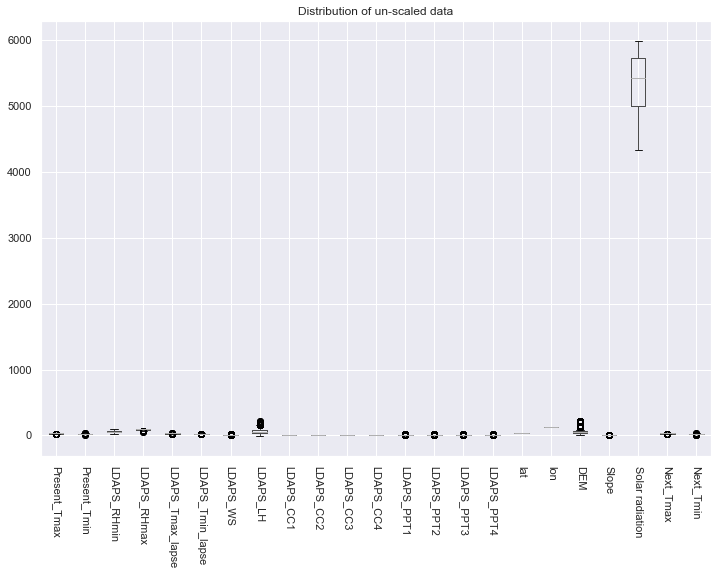

In [85]:
ds.boxplot(column = numeric, figsize = (12,8))
plt.xticks(rotation = -90)
plt.title('Distribution of un-scaled data')

From above boxplots, there are possible ouliers and skewed data.

In [86]:
# calculating IQR for outlier detecting 
q1 = ds[numeric].quantile(0.25)
q3 = ds[numeric].quantile(0.75)
iqr = q3-q1
print(iqr)

Present_Tmax          4.200000
Present_Tmin          3.200000
LDAPS_RHmin          21.226513
LDAPS_RHmax           9.520767
LDAPS_Tmax_lapse      4.036951
LDAPS_Tmin_lapse      3.063170
LDAPS_WS              2.353571
LDAPS_LH             46.956863
LDAPS_CC1             0.428835
LDAPS_CC2             0.418080
LDAPS_CC3             0.395316
LDAPS_CC4             0.417957
LDAPS_PPT1            0.052525
LDAPS_PPT2            0.018364
LDAPS_PPT3            0.007896
LDAPS_PPT4            0.000041
lat                   0.067400
lon                   0.105000
DEM                  31.132400
Slope                 1.496500
Solar radiation     729.297851
Next_Tmax             4.400000
Next_Tmin             3.300000
dtype: float64


In [87]:
ds[~(( ds < (q1 - 1.5 * iqr)) |( ds > (q3 + 1.5 * iqr))).any(axis=1)].shape[0]

3267

In [88]:
ds[~(( ds < (q1 - 3 * iqr)) |( ds > (q3 + 3 * iqr))).any(axis=1)].shape[0]

3918

From above code output, we see that by even multiplying 3 to IQR, we have lost huge data. This is probabliy due to highly skewed distribution of some columns, so let us check the skewness.

In [89]:
ds[numeric].skew()

Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

As we suspected, columns -'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3', 'LDAPS_PPT4' are highly skewed, also, since these columns are not correlated to our target variables (Next Tmax and Tmin), so we shall drop it.

In [90]:
# dropping columns
ds = ds.drop(['LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4'],1)
numeric.remove('LDAPS_PPT1')
numeric.remove('LDAPS_PPT2')
numeric.remove('LDAPS_PPT3')
numeric.remove('LDAPS_PPT4')

In [91]:
# calculating IQR for detecting outliers
q1 = ds[numeric].quantile(0.25)
q3 = ds[numeric].quantile(0.75)
iqr = q3-q1
print(iqr)

Present_Tmax          4.200000
Present_Tmin          3.200000
LDAPS_RHmin          21.226513
LDAPS_RHmax           9.520767
LDAPS_Tmax_lapse      4.036951
LDAPS_Tmin_lapse      3.063170
LDAPS_WS              2.353571
LDAPS_LH             46.956863
LDAPS_CC1             0.428835
LDAPS_CC2             0.418080
LDAPS_CC3             0.395316
LDAPS_CC4             0.417957
lat                   0.067400
lon                   0.105000
DEM                  31.132400
Slope                 1.496500
Solar radiation     729.297851
Next_Tmax             4.400000
Next_Tmin             3.300000
dtype: float64


In [92]:
ds[~((ds < (q1 - 3 * iqr)) |(ds > (q3 + 3 * iqr))).any(axis=1)].shape[0]

7075

In [93]:
# removing outliers from the dataset
ds = ds[~((ds < (q1 - 3 * iqr)) |(ds > (q3 + 3 * iqr))).any(axis=1)]

In [94]:
ds.isnull().sum()

station              0
Present_Tmax        66
Present_Tmin        66
LDAPS_RHmin         69
LDAPS_RHmax         69
LDAPS_Tmax_lapse    69
LDAPS_Tmin_lapse    69
LDAPS_WS            69
LDAPS_LH            69
LDAPS_CC1           69
LDAPS_CC2           69
LDAPS_CC3           69
LDAPS_CC4           69
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Date(year)           0
Date(month)          0
Date(weekday)        0
dtype: int64

In [95]:
# replacing null values with respective grouped median
for col in numeric:
    if ds[col].isnull().sum() != 0:
        ds[col] = ds.groupby(['Date(year)'])[col].transform(lambda x: x.fillna(x.median()))

In [96]:
ds.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Date(year)          0
Date(month)         0
Date(weekday)       0
dtype: int64

In [97]:
# removing  target variables from numeric list
numeric.remove('Next_Tmax')
numeric.remove('Next_Tmin')

In [98]:
# defining  function to  preprocess the data for modelling 
def data_preprocessor(df, target):
        
        # train-test split
        x_train, x_test, y_train, y_test = train_test_split(df.drop(['Next_Tmin','Next_Tmax'], 1), 
                                                    df[target],
                                                    test_size = 0.30, random_state = 42) 
        
        # encoding categorical variables
        for col in cat:
            encoder =  ce.TargetEncoder(cols = col)
            x_train[col] = encoder.fit_transform(x_train[col], y_train)
            x_test[col] = encoder.transform(x_test[col])
        
        # scaling numeric variables
        for col in numeric:
            scaler = StandardScaler()
            x_train[col] = scaler.fit_transform(x_train[col].values.reshape(-1,1))
            x_test[col] = scaler.transform(x_test[col].values.reshape(-1,1))
            
        # applying PCA to numeric columns
        pca = PCA(n_components = len(numeric))
        pca.fit(x_train[numeric])
        # The amount of variance that each PC can explain
        var= pca.explained_variance_ratio_
       # Cumulative Variance explained (%)
        varr=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
        
        # selecting n_components that can explain 98-100 % of variance
        for n, v in enumerate(varr,1):
            if 98 < v <= 100:
                n_components = n
                break
                
        # creating list of PCA components to transform train and test set
        pca_col = []
        
        for i in range(n_components):
            pca_col.append('pca_'+str(i+1))
            
    
        pca = PCA(n_components = n_components)
        pca.fit(x_train[numeric]) # fitting PCA for train set
        
        # adding PCA components to train and test set, using fitted PCA
        x_train[pca_col] = pca.transform(x_train.loc[:,numeric])
        x_test[ pca_col] = pca.transform(x_test.loc[:,numeric])

        # removing numeric columns that are fitted for PCA
        x_train.drop(numeric, 1, inplace = True)
        x_test.drop(numeric, 1, inplace = True)
        
        return x_train, x_test, y_train, y_test

In [99]:
# preprocessing of data for prediction of 'Next_Tmin'
x_train, x_test, y_train, y_test = data_preprocessor(ds, 'Next_Tmin')

In [100]:
x_train

,station,Date(year),Date(month),Date(weekday),pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15
6033,22.888789,23.758858,23.181103,23.297644,-1.408297,-0.650307,-0.750184,0.869544,1.283584,2.862687,-0.322821,-1.118031,0.013285,-0.708364,1.111105,-0.026008,-0.001372,0.919290,0.225105
2845,23.533014,22.106998,23.181103,23.297644,3.669999,0.132685,-1.124819,-0.014667,-1.186700,0.788851,-0.548593,0.841359,0.135623,0.157153,-0.026589,0.011594,-0.228145,-0.356063,-0.078091
7211,22.034300,23.330081,23.181103,23.297644,0.405115,-0.434873,0.305367,-2.634307,0.485017,0.040435,-0.859533,-0.104163,0.006672,0.429441,0.169428,1.622375,-1.056666,1.013873,0.159934
1956,23.656373,22.106998,23.121318,23.297644,0.024684,-0.051806,-0.664561,1.870632,0.539091,0.615001,1.014496,-1.322541,-1.502257,0.088042,-0.472763,0.070312,-0.140801,0.159253,-0.553887
6631,23.656373,23.330081,23.121318,22.971879,-0.561739,-0.515189,-0.131535,2.879239,0.477493,0.017698,-0.007326,-1.428228,-1.476781,-0.378022,-0.256352,-0.275585,-0.866716,0.869980,-0.197427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,22.842647,22.594990,23.181103,22.971879,-0.769040,2.257865,4.331993,-0.550970,0.765673,0.860193,-0.941298,-0.735438,-0.073005,0.330917,-0.266060,-0.276445,0.610616,0.196263,-0.603181
5691,21.353271,23.758858,23.181103,23.297644,-2.922021,-0.383975,2.056364,1.373616,-1.835720,0.470334,0.318227,-0.145037,0.081603,0.094988,0.168404,1.130623,0.163286,-0.655167,-0.442348
5729,22.853738,23.758858,23.181103,23.385972,-3.483853,-1.296403,1.645788,1.739141,-1.457642,0.907608,0.745202,0.289742,1.291471,-0.392582,0.083571,0.633817,-0.106238,-0.589059,-0.066257
5907,23.428440,23.758858,23.181103,23.385972,-1.146305,-2.572813,-0.310960,-0.921675,1.061547,1.456330,-1.131500,0.075870,0.837048,0.782051,1.424052,-0.832352,-0.390847,0.226676,0.479872


In [101]:
k =  KFold(n_splits = 10)

 ## Prediction of Next Tmin

### Base Model Evaluation

model: RandomForestRegressor()
CV score:0.8801972325648064
score_std: 0.012029458263055794
----------
model: LinearRegression(normalize=True)
CV score:0.8386369440785739
score_std: 0.013478210280810482
----------
model: SVR()
CV score:0.8217246452443586
score_std: 0.016577746491043
----------
model: AdaBoostRegressor()
CV score:0.7654525762515204
score_std: 0.012718575462275195
----------
model: GradientBoostingRegressor()
CV score:0.8619363340195987
score_std: 0.012799351598120625
----------
model: KNeighborsRegressor()
CV score:0.8627680367787283
score_std: 0.012979474099375646
----------
model: XGBRegressor()
CV score:0.8627279013753508
score_std: 0.012605247398720775
----------
model: Lasso(normalize=True)
CV score:-0.0032702445787798017
score_std: 0.002475390350039579
----------
model: Ridge(normalize=True)
CV score:0.6444626478936686
score_std: 0.009118978395004449
----------
model: ElasticNet()
CV score:0.6754218871023858
score_std: 0.015320077564119083
----------
model: Decisio

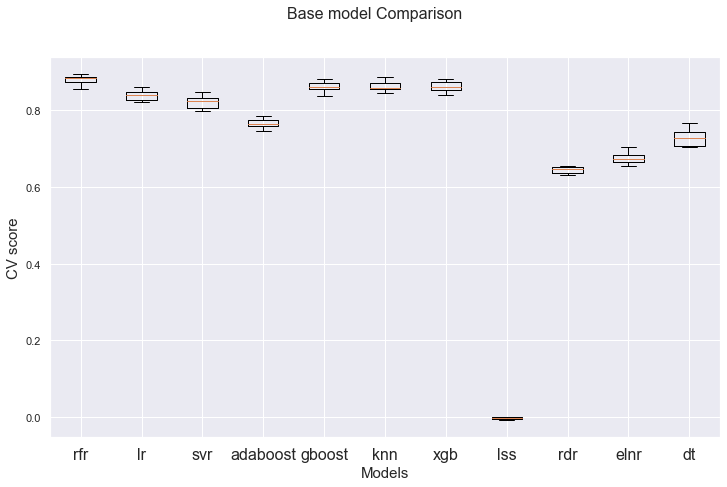

In [102]:
# inilializing different models
rfr = RandomForestRegressor()
svr = SVR()
lr = LinearRegression(normalize = True)
adaboost =  AdaBoostRegressor()
gboost = GradientBoostingRegressor()
knn = KNeighborsRegressor()
xgb = xgboost.XGBRegressor()
lss = Lasso(normalize = True)
rdr = Ridge(normalize = True)
elnr = ElasticNet()
dt = DecisionTreeRegressor()

models = [rfr, lr, svr, adaboost, gboost, knn, xgb, lss, rdr, elnr, dt]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = k, scoring = 'r2', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 16)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfr', 'lr','svr', 'adaboost', 'gboost', 'knn', 'xgb','lss','rdr','elnr','dt'],
                  fontsize = 16)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('CV score', fontsize = 15)
fig.set_size_inches(12,7)
plt.show() 

Based on above cross-val-scores, we shall select model like rfr, gboost, knn and xgb for further tuning to address any overfitting. 

### Hyper-parameter tuning

In [103]:
param_rfr = dict(n_estimators = [10,15,20,25,30], criterion = ['mse', 'mae'],
                max_depth = [3,4,5,6,7,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [40,41,42,43,44])

param_knn = dict(n_neighbors = np.arange(1,20,1), weights = ['uniform','distance'],
                algorithm = ['auto', 'all_tree', 'kd_tree', 'brute'])

param_gboost =  dict(
    learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.5],
    max_depth = [ 2,3, 4, 5, 6,7, 8],
    n_estimators = [100, 150, 200,250,300],
    min_samples_split = [1,2,3], random_state = [40,41,42,43,44],
    alpha = [0.05,0.1,0.5,0.75,1,1.75,2])


param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ],
     alpha = [0.05,0.1,0.5,0.75,1,1.75,2]
     )

In [104]:
model_param_list = [ (rfr,param_rfr), (xgb, param_xgb), (gboost, param_gboost), (knn,param_knn)]

In [105]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_search = RandomizedSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'neg_root_mean_squared_error',
                                 random_state = 42)
    
    r_search.fit(x_train, y_train)
    best_cvscore = r_search.best_score_
    best_param = r_search.best_params_
    best_estimator = r_search.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
print('best_estimators:',best_estimator_list)

model: RandomForestRegressor()
best_cvscore: -0.8668247283317644
best_param: {'random_state': 43, 'n_estimators': 20, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'mse'}


[22:06:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model: XGBRegressor()
best_cvscore: -0.8048151310135451
best_param: {'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.7, 'alpha': 0.5}


model: GradientBoostingRegressor()
best_cvscore: -0.7620669664227417
best_param: {'random_state': 44, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 7, 'learning_rate': 0.1, 'alpha': 0.75}


model: KNeighborsRegressor()
best_cvscore: -0.8916437063045468
best_param: {'weights': 'distance', 'n_neighbors': 8, 'algorithm': 'auto'}


best_estimators: [RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=20,
                      random_state=43), XGBRegresso

### Testing

In [106]:
# testing for train data

print('*******TRAIN RESULTS*******')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    score = r2_score(y_train, y_pred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('root_mean_squared_error:',mean_squared_error(y_train, y_pred, squared = False))
    print('-------------------------------------------')

*******TRAIN RESULTS*******


model RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=20,
                      random_state=43)
accuracy (r2_score): 97.55 %
root_mean_squared_error: 0.3819113816205288
-------------------------------------------
[22:07:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model XGBRegressor(alpha=0.5, colsample_bytree=0.7, gamma=0.3, learning_rate=0.25,
             max_depth=10)
accuracy (r2_score): 99.52 %
root_mean_squared_error: 0.16885336878781854
-------------------------------------------
model GradientBoostingRegressor(alpha=0.75, max_depth=7, n_estimators=200,
                          random_state=44)
accuracy (r2_score): 99.44 %
root_mean_squared_error: 0.18216534680660368
-------------------------------------------
model KNeighborsRegressor(n_neighbors=8, weights='distance')
accuracy (r2_score): 100.0 %
root_mean_squared_error: 0.0
-----------------------------

In [107]:
#testing for test data
print('*******TEST RESULTS*******')
print('\n')
for model in best_estimator_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('root_mean_squared_error:',mean_squared_error(y_test, y_pred, squared = False))
    print('-------------------------------------------')

*******TEST RESULTS*******


model RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=20,
                      random_state=43)
accuracy (r2_score): 88.37 %
root_mean_squared_error: 0.8165079433992258
-------------------------------------------
[22:07:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model XGBRegressor(alpha=0.5, colsample_bytree=0.7, gamma=0.3, learning_rate=0.25,
             max_depth=10)
accuracy (r2_score): 89.35 %
root_mean_squared_error: 0.7810989140453986
-------------------------------------------
model GradientBoostingRegressor(alpha=0.75, max_depth=7, n_estimators=200,
                          random_state=44)
accuracy (r2_score): 90.56 %
root_mean_squared_error: 0.7354658459173771
-------------------------------------------
model KNeighborsRegressor(n_neighbors=8, weights='distance')
accuracy (r2_score): 87.59 %
root_mean_squared_error: 0.8434569491324836
-----------------

Based on above train and test results, GradientBoostingRegressor scored the highest r2 score and has lowest root mean sqaured error on the test data, hence, we shall choose it as our final model for our regression problem.  

In [108]:
# selecting best model as GradientBoostingRegressor.
selected_model = GradientBoostingRegressor(alpha=0.75, max_depth=7, n_estimators=200,
                          random_state=44)

selected_model.fit(x_train, y_train)
y_pred = selected_model.predict(x_test)

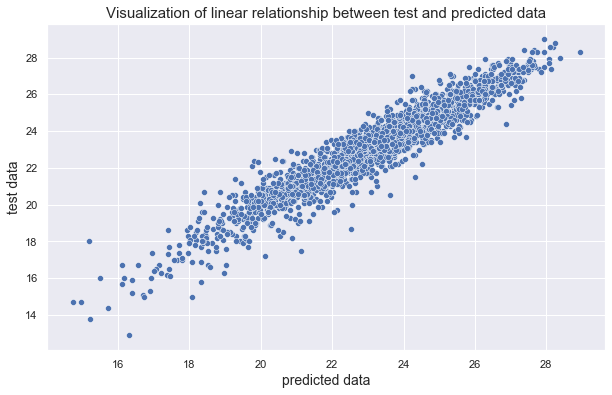

In [109]:
plt.figure(figsize = (10,6))
sb.scatterplot(y_pred,y_test )
plt.xlabel('predicted data', fontsize = 14)
plt.ylabel('test data',  fontsize = 14)
plt.title('Visualization of linear relationship between test and predicted data',fontsize = 15 )
plt.show()

From above plot, we see that the variables are correlated and hence we can visualize linear relationship.

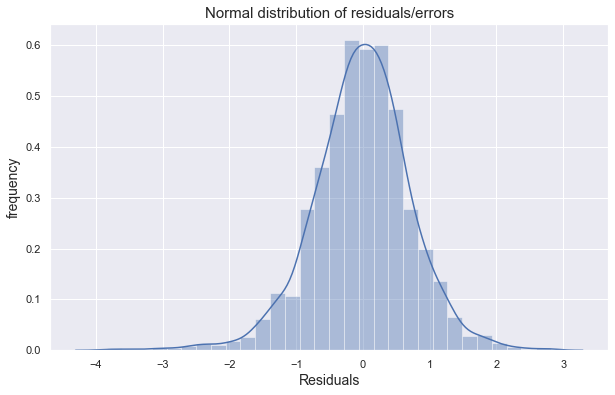

In [110]:
plt.figure(figsize = (10,6))
sb.distplot((y_test-y_pred), bins = 30)
plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('frequency',  fontsize = 14)
plt.title('Normal distribution of residuals/errors',fontsize = 15 )
plt.show()

From above distribution plot, we see the residuals from the selected model are normally distributed with approximately zero mean, which is a standard for a preferred  regression models.

In [111]:
test_df = pd.DataFrame({'Actual Next Tmin':y_test.values,'Predicted Next Tmin':y_pred})

In [112]:
test_df.to_csv('next_tmin_pred.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


In [113]:
# Saving the final model as GradientBoostingRegressor.
import joblib

joblib.dump(selected_model, 'next_tmin_pred.obj')
print('Model successfully saved.')

Model successfully saved.


## Prediction of Next Tmax

### Base Model Evaluation

In [114]:
# preprocessing of data for prediction of 'Next_Tmax'
x_train, x_test, y_train, y_test = data_preprocessor(ds, target = 'Next_Tmax')

model: RandomForestRegressor()
CV score:0.8678719875928241
score_std: 0.011136767373150983
----------
model: LinearRegression(normalize=True)
CV score:0.7593384312061515
score_std: 0.018558717444738315
----------
model: SVR()
CV score:0.7221165669866556
score_std: 0.015982805977579912
----------
model: AdaBoostRegressor()
CV score:0.6948315398666505
score_std: 0.01576314969327369
----------
model: GradientBoostingRegressor()
CV score:0.7973155112640271
score_std: 0.012784759146122164
----------
model: KNeighborsRegressor()
CV score:0.8476846959236711
score_std: 0.011986330616382204
----------
model: XGBRegressor(silent=True)
CV score:0.7969963507662523
score_std: 0.0116139466115208
----------
model: Lasso(normalize=True)
CV score:-0.0027793691382381968
score_std: 0.0021592992899512864
----------
model: Ridge(normalize=True)
CV score:0.5775942210269183
score_std: 0.01299179770727274
----------
model: ElasticNet()
CV score:0.6451314229831759
score_std: 0.016194217150675386
----------
mod

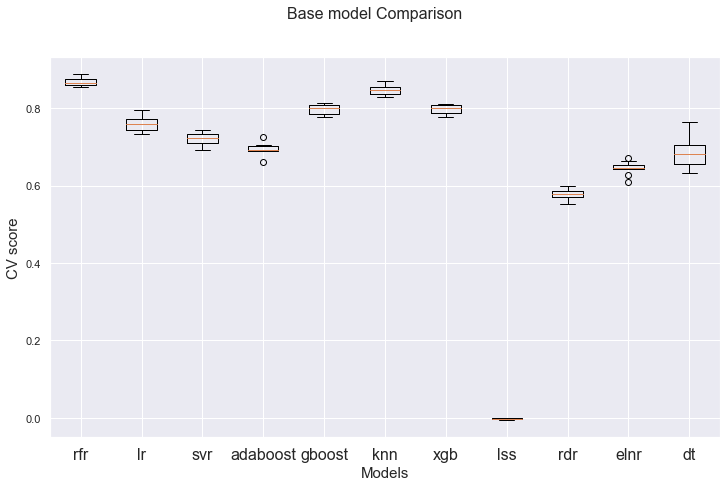

In [115]:
# inilializing different models
rfr = RandomForestRegressor()
svr = SVR()
lr = LinearRegression(normalize = True)
adaboost =  AdaBoostRegressor()
gboost = GradientBoostingRegressor()
knn = KNeighborsRegressor()
xgb = xgboost.XGBRegressor(silent = True)
lss = Lasso(normalize = True)
rdr = Ridge(normalize = True)
elnr = ElasticNet()
dt = DecisionTreeRegressor()

models = [rfr, lr, svr, adaboost, gboost, knn, xgb, lss, rdr, elnr, dt]

scores = []
for model in models:
    
    score = cross_val_score(model, x_train, y_train, cv = k, scoring = 'r2', n_jobs = -1 )
    mean_score = score.mean()
    std_score = score.std()
    
    print('model: {}'.format(model))
    print('CV score:{}'.format(mean_score))
    print('score_std:',std_score)
    print('----------')
    scores.append(score)
    
fig = plt.figure()
fig.suptitle('Base model Comparison', fontsize = 16)
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(['rfr', 'lr','svr', 'adaboost', 'gboost', 'knn', 'xgb','lss','rdr','elnr','dt'],
                  fontsize = 16)
plt.xlabel('Models', fontsize = 15)
plt.ylabel('CV score', fontsize = 15)
fig.set_size_inches(12,7)
plt.show() 

Based on above cross-val-scores, we shall choose same models like- rfr, gboost, knn and xgb that had been choosen in predicting Next Tmin.

### Hyper-parameter tuning

In [ ]:
param_rfr = dict(n_estimators = [10,15,20,25,30], criterion = ['mse', 'mae'],
                max_depth = [3,4,5,6,7,None],min_samples_split = [2,3,4],
                min_samples_leaf = [1,2,3], random_state = [40,41,42,43,44])

param_knn = dict(n_neighbors = np.arange(1,20,1), weights = ['uniform','distance'],
                algorithm = ['auto', 'all_tree', 'kd_tree', 'brute'])

param_gboost =  dict(
    learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.5],
    max_depth = [ 2,3, 4, 5, 6,7, 8],
    n_estimators = [100, 150, 200,250,300],
    min_samples_split = [1,2,3], random_state = [40,41,42,43,44],
    alpha = [0.05,0.1,0.5,0.75,1,1.75,2])


param_xgb = dict( learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
     max_depth = [ 3, 4, 5, 6, 8, 10, 12, 15],
     min_child_weight = [ 1, 3, 5, 7 ],
     gamma = [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     colsample_bytree = [ 0.3, 0.4, 0.5 , 0.7 ],
     alpha = [0.05,0.1,0.5,0.75,1,1.75,2]
     )

In [ ]:
model_param_list = [ (rfr,param_rfr), (xgb, param_xgb), (gboost, param_gboost), (knn,param_knn)]

In [116]:
%%time
best_estimator_list = []
for model, param in model_param_list:
    
    r_search = RandomizedSearchCV(model, param, cv = k, n_jobs = -1, scoring = 'neg_root_mean_squared_error',
                                 random_state = 42)
    
    r_search.fit(x_train, y_train)
    best_cvscore = r_search.best_score_
    best_param = r_search.best_params_
    best_estimator = r_search.best_estimator_
    best_estimator_list.append(best_estimator)
    
    print('model:',model)
    print('best_cvscore:',best_cvscore)
    print('best_param:', best_param)
    print('\n')
print('best_estimators:',best_estimator_list)

model: RandomForestRegressor()
best_cvscore: -1.1472940719112674
best_param: {'random_state': 43, 'n_estimators': 20, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'mse'}


[22:09:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model: XGBRegressor()
best_cvscore: -1.1509894438334882
best_param: {'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.25, 'gamma': 0.3, 'colsample_bytree': 0.7, 'alpha': 0.5}


model: GradientBoostingRegressor()
best_cvscore: -1.0312222780299636
best_param: {'random_state': 44, 'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 7, 'learning_rate': 0.1, 'alpha': 0.75}


model: KNeighborsRegressor()
best_cvscore: -1.176762556577731
best_param: {'weights': 'distance', 'n_neighbors': 8, 'algorithm': 'auto'}


best_estimators: [RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=20,
                      random_state=43), XGBRegressor

### Testing

In [117]:
# testing for train data
print('*******TRAIN RESULTS*******')
print('\n')

for model in best_estimator_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    score = r2_score(y_train, y_pred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('root_mean_squared_error:',mean_squared_error(y_train, y_pred, squared = False))
    print('-------------------------------------------')

*******TRAIN RESULTS*******


model RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=20,
                      random_state=43)
accuracy (r2_score): 97.15 %
root_mean_squared_error: 0.5160443217785371
-------------------------------------------
[22:10:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model XGBRegressor(alpha=0.5, colsample_bytree=0.7, gamma=0.3, learning_rate=0.25,
             max_depth=10)
accuracy (r2_score): 99.64 %
root_mean_squared_error: 0.18396118106300796
-------------------------------------------
model GradientBoostingRegressor(alpha=0.75, max_depth=7, n_estimators=200,
                          random_state=44)
accuracy (r2_score): 99.25 %
root_mean_squared_error: 0.2648007993462511
-------------------------------------------
model KNeighborsRegressor(n_neighbors=8, weights='distance')
accuracy (r2_score): 100.0 %
root_mean_squared_error: 0.0
------------------------------

In [118]:
#testing for test data
print('*******TEST RESULTS*******')
print('\n')
for model in best_estimator_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    print('model',model)
    print('accuracy (r2_score):',  round(score*100,2),'%')
    print('root_mean_squared_error:',mean_squared_error(y_test, y_pred, squared = False))
    print('-------------------------------------------')

*******TEST RESULTS*******


model RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=20,
                      random_state=43)
accuracy (r2_score): 86.83 %
root_mean_squared_error: 1.1036886130996164
-------------------------------------------
[22:11:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model XGBRegressor(alpha=0.5, colsample_bytree=0.7, gamma=0.3, learning_rate=0.25,
             max_depth=10)
accuracy (r2_score): 87.14 %
root_mean_squared_error: 1.0905757442461195
-------------------------------------------
model GradientBoostingRegressor(alpha=0.75, max_depth=7, n_estimators=200,
                          random_state=44)
accuracy (r2_score): 89.58 %
root_mean_squared_error: 0.981790553138054
-------------------------------------------
model KNeighborsRegressor(n_neighbors=8, weights='distance')
accuracy (r2_score): 86.09 %
root_mean_squared_error: 1.1345108322014101
------------------

Based on above train and test results, GradientBoostingRegressor scored the highest r2 score and has lowest root mean sqaured error on the test data, hence, we shall choose it as our final model for our regression problem for predicting Next Tmax.  

In [119]:
# selecting best model as GradientBoostingRegressor.
selected_model_2 = GradientBoostingRegressor(alpha=0.75, max_depth=7, n_estimators=200,
                          random_state=44)

selected_model_2.fit(x_train, y_train)
y_pred = selected_model_2.predict(x_test)

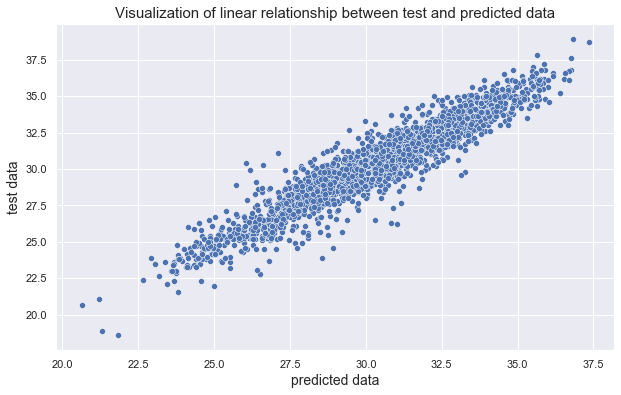

In [120]:
plt.figure(figsize = (10,6))
sb.scatterplot(y_pred,y_test )
plt.xlabel('predicted data', fontsize = 14)
plt.ylabel('test data',  fontsize = 14)
plt.title('Visualization of linear relationship between test and predicted data',fontsize = 15 )
plt.show()

From above plot, we see that the variables are correlated and hence we can visualize their linear relationship, that gives us the indication of a good regression model.

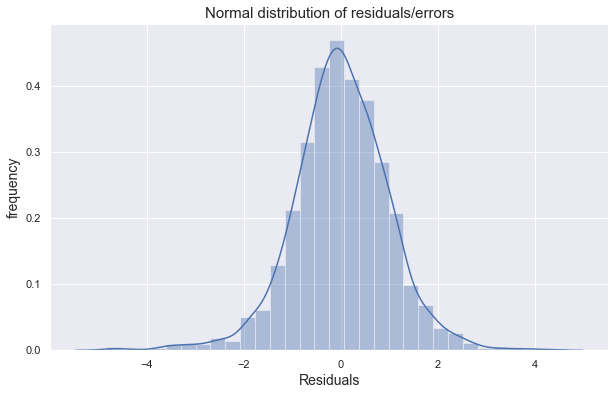

In [121]:
plt.figure(figsize = (10,6))
sb.distplot((y_test-y_pred), bins = 30)
plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('frequency',  fontsize = 14)
plt.title('Normal distribution of residuals/errors',fontsize = 15 )
plt.show()

From above distribution plot, we see the residuals from the selected model are normally distributed with approximately zero mean, which is a standard for a preferred  regression models.

In [122]:
test_df = pd.DataFrame({'Actual Next Tmax':y_test.values,'Predicted Next Tmax':y_pred})

In [123]:
test_df.to_csv('next_tmax_pred.csv', index = False)
print('Predicted result stored sucessfully.')

Predicted result stored sucessfully.


In [124]:
# Saving the final model as GradientBoostingRegressor.
import joblib

joblib.dump(selected_model_2, 'next_tmax_pred.obj')
print('Model successfully saved.')

Model successfully saved.
